In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 1000

# Features
product_price = np.random.uniform(50, 200, n_samples)
marketing_spend = np.random.uniform(100, 1000, n_samples)

# Sales: This is a hypothetical formula to generate sales. 
sales = (marketing_spend / 10) - (product_price / 20) + np.random.normal(0, 10, n_samples)

# Create a dataframe
data = pd.DataFrame({
    'product_price': product_price,
    'marketing_spend': marketing_spend,
    'sales': sales
})

data.head()


,product_price,marketing_spend,sales
0,106.181018,266.619636,12.573087
1,192.607146,587.710853,40.871924
2,159.799091,885.651252,78.310382
3,139.798773,759.002398,72.583956
4,73.402796,825.905033,88.056210


In [4]:
# Splitting the data into training and testing sets
X = data[['product_price', 'marketing_spend']]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model on the test set
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

train_score, test_score


(0.9843226549902391, 0.829422927714992)

In [6]:
# Predict sales for a range of marketing spends
marketing_range = np.linspace(data['marketing_spend'].min(), data['marketing_spend'].max(), 100)
predicted_sales = model.predict(np.column_stack((np.full_like(marketing_range, data['product_price'].mean()), marketing_range)))


In [7]:
max_sales_index = np.argmax(predicted_sales)
optimal_marketing_spend = marketing_range[max_sales_index]
optimal_sales = predicted_sales[max_sales_index]
optimal_marketing_spend, optimal_sales


(999.4723531935999, 97.71117)

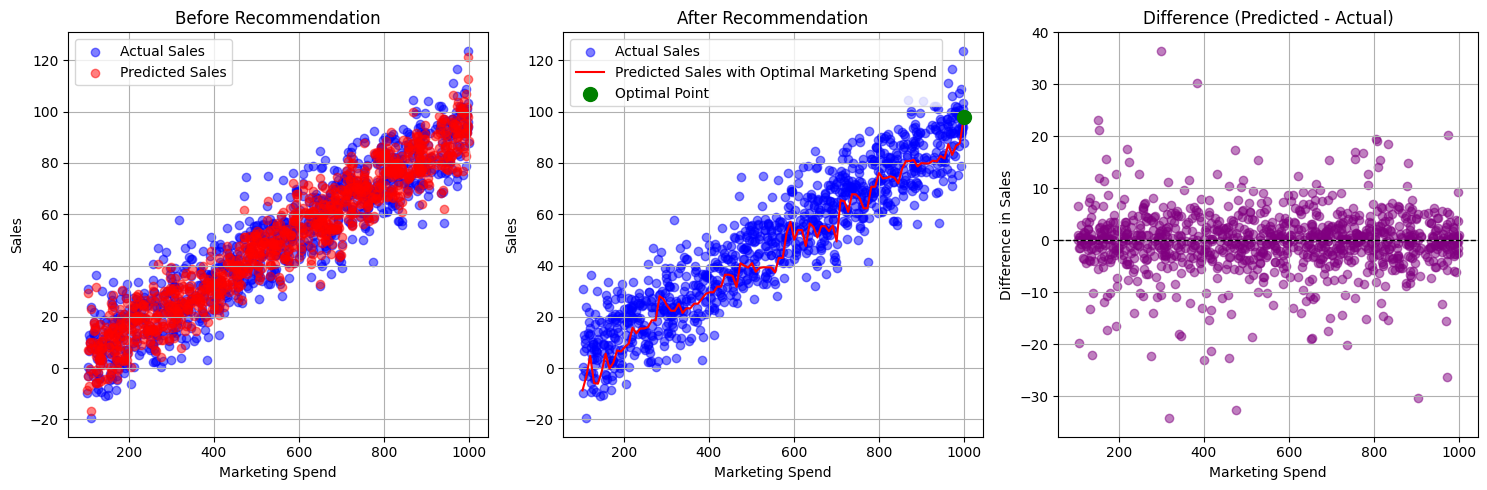

In [ ]:
# Predict sales for the actual marketing spends in the dataset
actual_predicted_sales = model.predict(X)

plt.figure(figsize=(15, 5))

# Before Recommendation
plt.subplot(1, 3, 1)
plt.scatter(data['marketing_spend'], data['sales'], color='blue', alpha=0.5, label="Actual Sales")
plt.scatter(data['marketing_spend'], actual_predicted_sales, color='red', alpha=0.5, label="Predicted Sales")
plt.title("Before Recommendation")
plt.xlabel("Marketing Spend")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)

# After Recommendation
plt.subplot(1, 3, 2)
plt.scatter(data['marketing_spend'], data['sales'], color='blue', alpha=0.5, label="Actual Sales")
plt.plot(marketing_range, predicted_sales, color='red', label="Predicted Sales with Optimal Marketing Spend")
plt.scatter(optimal_marketing_spend, optimal_sales, color='green', s=100, zorder=5, label="Optimal Point")
plt.title("After Recommendation")
plt.xlabel("Marketing Spend")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)

# Difference
plt.subplot(1, 3, 3)
difference = actual_predicted_sales - data['sales'].values
plt.scatter(data['marketing_spend'], difference, color='purple', alpha=0.5)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Difference (Predicted - Actual)")
plt.xlabel("Marketing Spend")
plt.ylabel("Difference in Sales")
plt.grid(True)

plt.tight_layout()
plt.show()
